<a href="https://colab.research.google.com/github/Dinu-Nimnara/CM2604_CW_2425587/blob/main/CM2604_CW_2425587.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 01. Data loading and overview

Load the Telco Customer Churn dataset into a pandas DataFrame and perform an initial inspection.  
- structure of the dataset, types of features, missing values, and basic statistics.

In [4]:
#Telco-Customer-Churn-Dataset

import pandas as pd

# Load dataset
#df = pd.read_csv("/content/Telco-Customer-Churn-Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/C2604-CW-Telco-Churn/Telco-Customer-Churn-Dataset.csv")



**Dataset overview**

In [5]:
# first few rows
print("-----Dataset Head -----")
display(df.head())

#dataset shape (rows, columns)
print("\n\n-------Dataset shape------\n", df.shape)

#data types and missing values
print("\n\n------ Dataset info -----")
df.info()


-----Dataset Head -----


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




-------Dataset shape------
 (7043, 21)


------ Dataset info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          70

**Summary dtatistics**

In [6]:

# Summary statistics
print("----- Summary -----")
display(df.describe())
df.columns.tolist()

print("\n----- Summary for Categorical Features -----")
display(df.describe(include='object'))



----- Summary -----


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



----- Summary for Categorical Features -----


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Missing values**

In [7]:
# missing values per column
print("----- Missing values -----")
missing = df.isnull().sum()
print(missing)

display(missing[missing > 0] if missing.sum() > 0 else "No missing values")

# Percentage view (nice to have)
print("\n----- Missing Values (%) -----")
display((df.isnull().mean() * 100).round(2)[lambda x: x > 0])

----- Missing values -----
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


'No missing values'


----- Missing Values (%) -----


,0


**Duplications**

In [8]:
#duplicate rows
print("----- Duplication rows -----")
print(df.duplicated().sum())


----- Duplication rows -----
0


**Unique values**

In [9]:
# #unique values
# print("----- Unique values -----")
# df.nunique()

print("----- Number of Unique Values per Column -----")
unique_counts = df.nunique().sort_values(ascending=False)
display(pd.DataFrame({'Column': unique_counts.index, 'Unique_Count': unique_counts.values}))

#high-cardinality features
print("\nHigh cardinality columns (>50 unique values):")
display(unique_counts[unique_counts > 50])

----- Number of Unique Values per Column -----


,Column,Unique_Count
0,customerID,7043
1,TotalCharges,6531
2,MonthlyCharges,1585
3,tenure,73
4,PaymentMethod,4
5,StreamingMovies,3
6,TechSupport,3
7,OnlineBackup,3
8,StreamingTV,3
9,DeviceProtection,3



High cardinality columns (>50 unique values):


,0
customerID,7043
TotalCharges,6531
MonthlyCharges,1585
tenure,73


**Summary table**

In [10]:
summary = pd.DataFrame({
    'Dtype': df.dtypes,
    'Missing': df.isnull().sum(),
    'Missing_%': (df.isnull().mean() * 100).round(2),
    'Unique': df.nunique(),
    'Duplicates': len(df) - len(df.drop_duplicates())
}, index=df.columns)

display(summary)

,Dtype,Missing,Missing_%,Unique,Duplicates
customerID,object,0,0.0,7043,0
gender,object,0,0.0,2,0
SeniorCitizen,int64,0,0.0,2,0
Partner,object,0,0.0,2,0
Dependents,object,0,0.0,2,0
tenure,int64,0,0.0,73,0
PhoneService,object,0,0.0,2,0
MultipleLines,object,0,0.0,3,0
InternetService,object,0,0.0,3,0
OnlineSecurity,object,0,0.0,3,0


**Fixing hidden totalCHarges issue**

In [11]:

print("Fixing TotalCharges (11 hidden blank values)...")

# Before status
print(f"Before → dtype: {df['TotalCharges'].dtype}")
print(f"Blank strings found: {(df['TotalCharges'] == ' ').sum()}")

# Fix
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')        # " " → NaN
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)   # smart imputation

# After status
print(f"After  → dtype: {df['TotalCharges'].dtype}")
print(f"Final missing values: {df['TotalCharges'].isna().sum()}")

Fixing TotalCharges (11 hidden blank values)...
Before → dtype: object
Blank strings found: 11
After  → dtype: float64
Final missing values: 0


/tmp/ipython-input-1666643343.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)   # smart imputation


# 02. Exploratory Data Analysis - EDA

-The distribution of the target variable (Churn)

-Patterns in numerical and categorical features

-Correlations between key variables

Identify factors influencing churn and support feature engineering

In [12]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns


**Churn distribution with perc lables**

/tmp/ipython-input-1922527173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


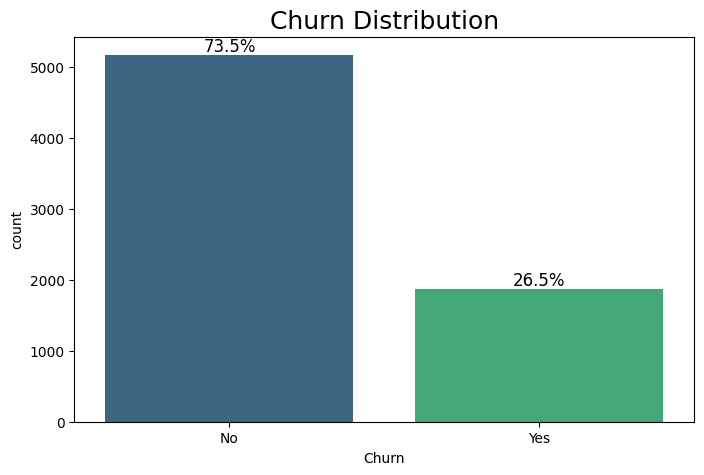

Churn rate: 26.5%


In [13]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Distribution', fontsize=18)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(df):.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

print(f"Churn rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.1f}%")

**Numerical Feature Distributions**

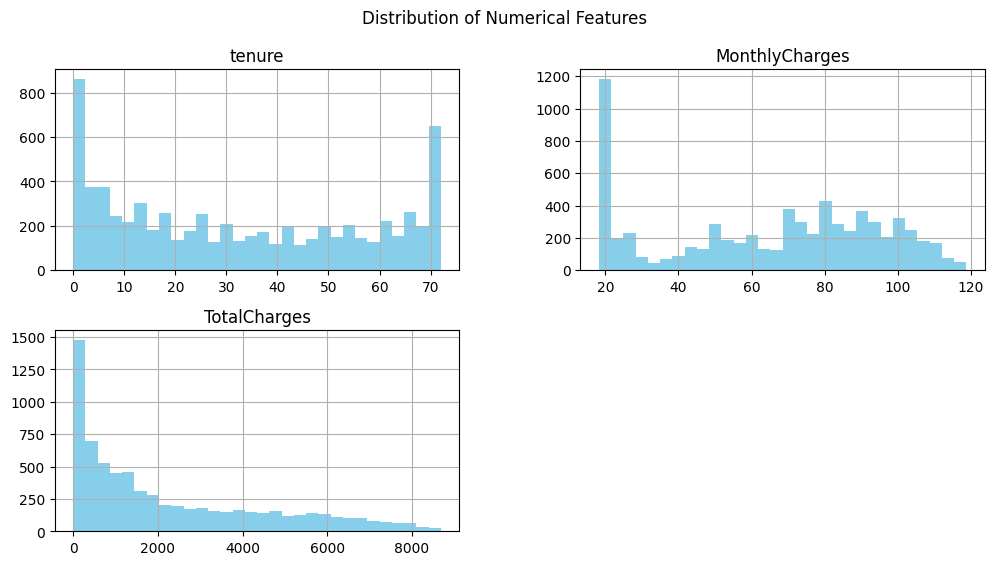

In [14]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_cols].hist(figsize=(12, 6), bins=30, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


**Numerical Features vs Churn - Boxplots**

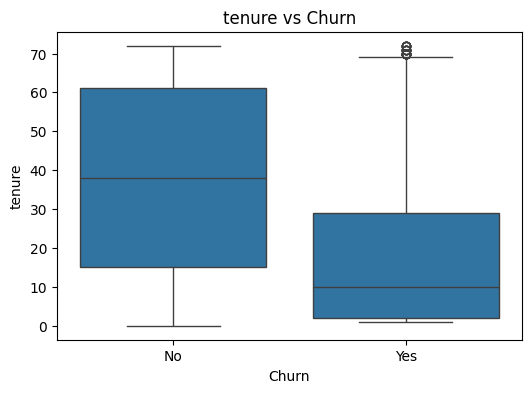

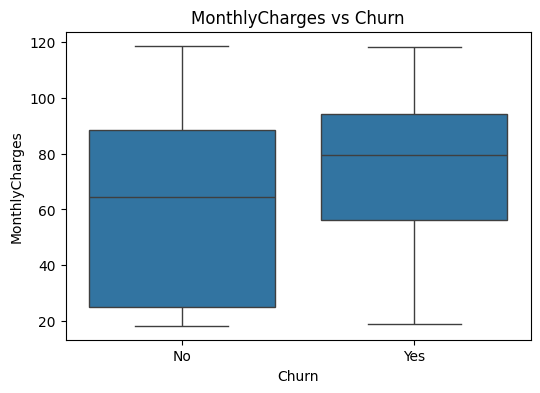

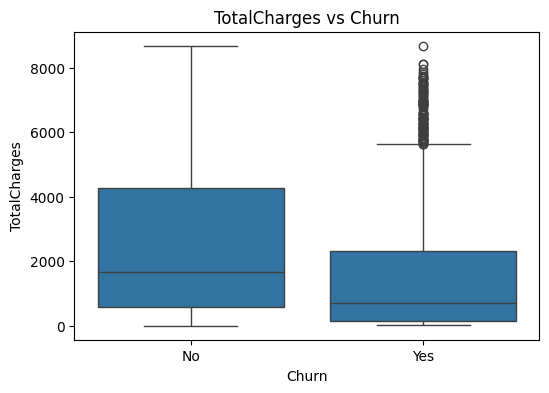

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


**Categorical Features vs Churn (Barplots)**

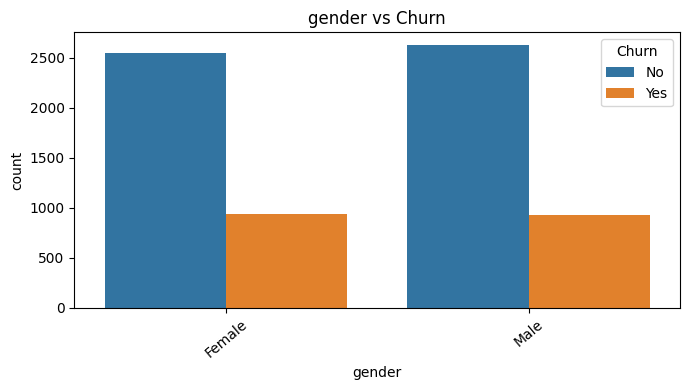

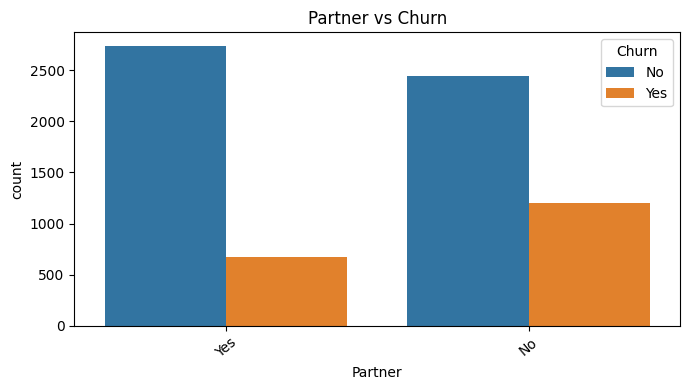

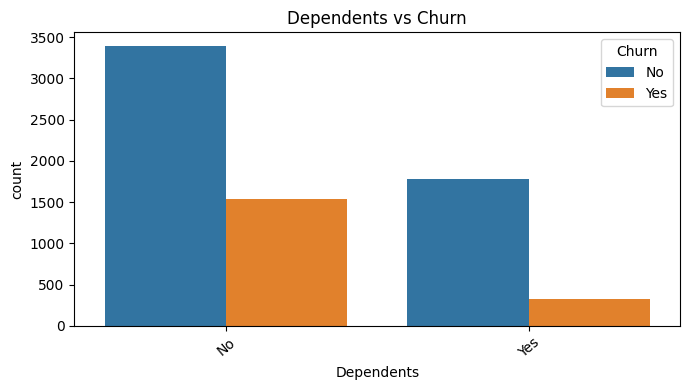

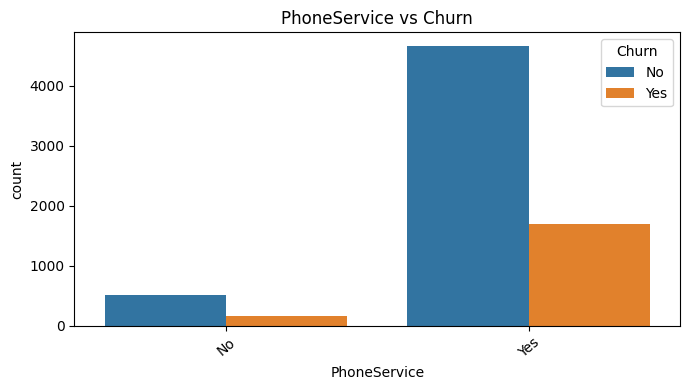

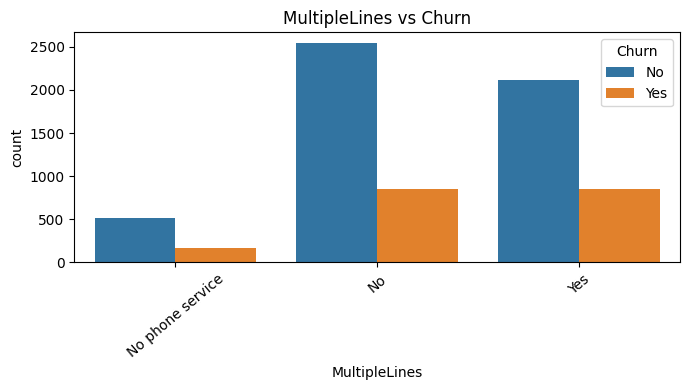

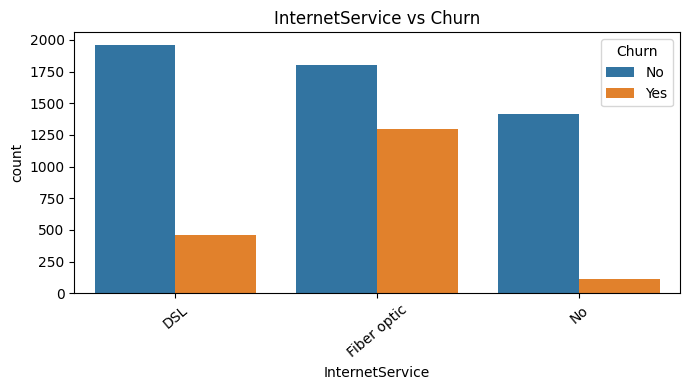

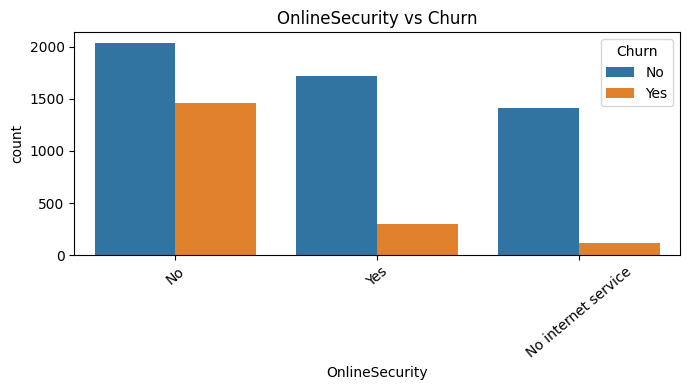

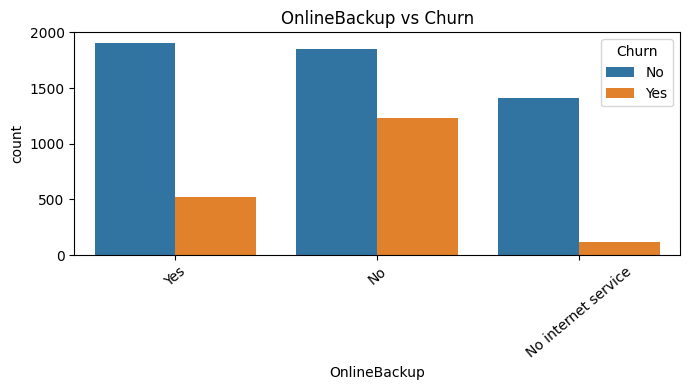

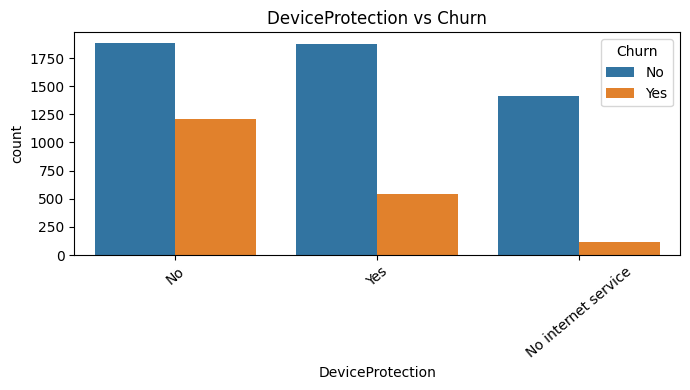

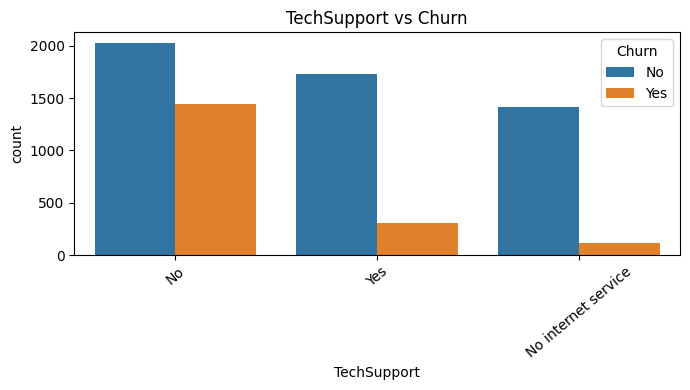

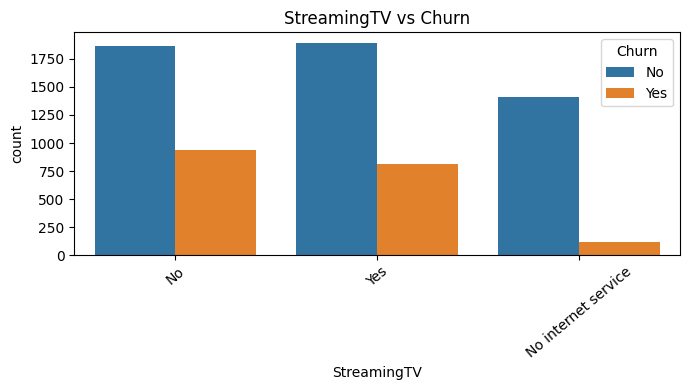

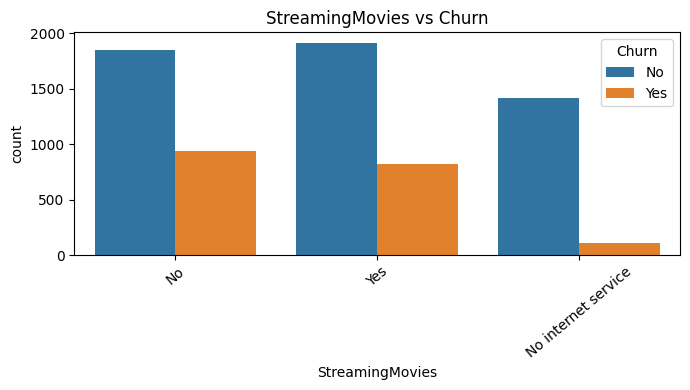

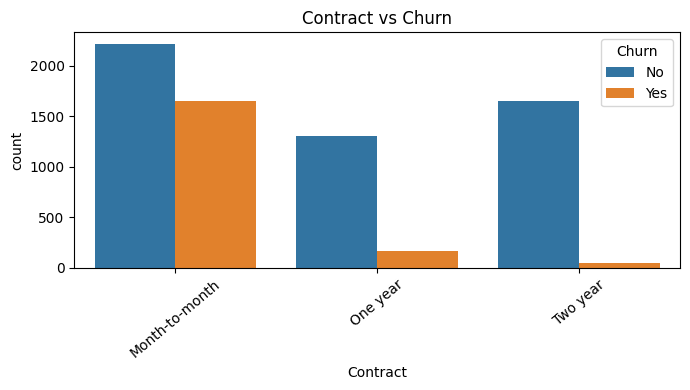

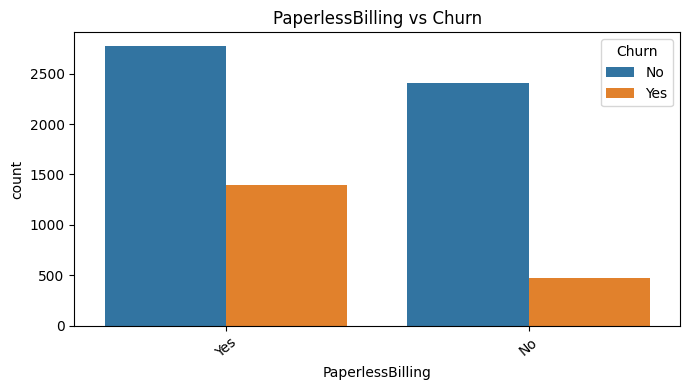

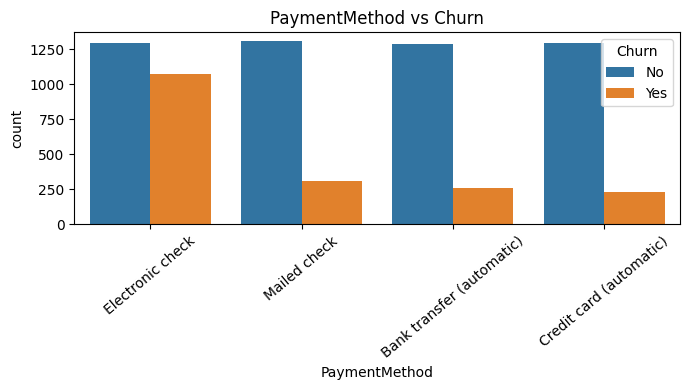

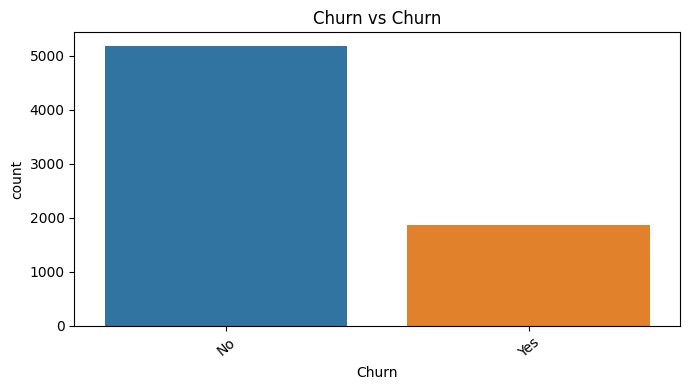

In [16]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.xticks(rotation=40)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()
    plt.show()


**Correlation Heatmap - numerical**

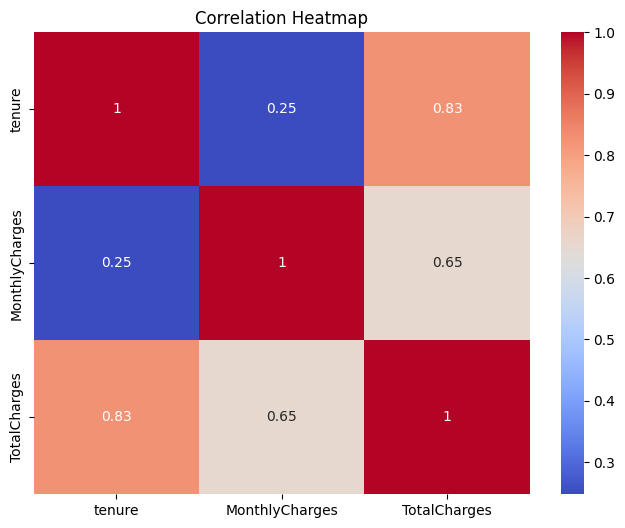

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


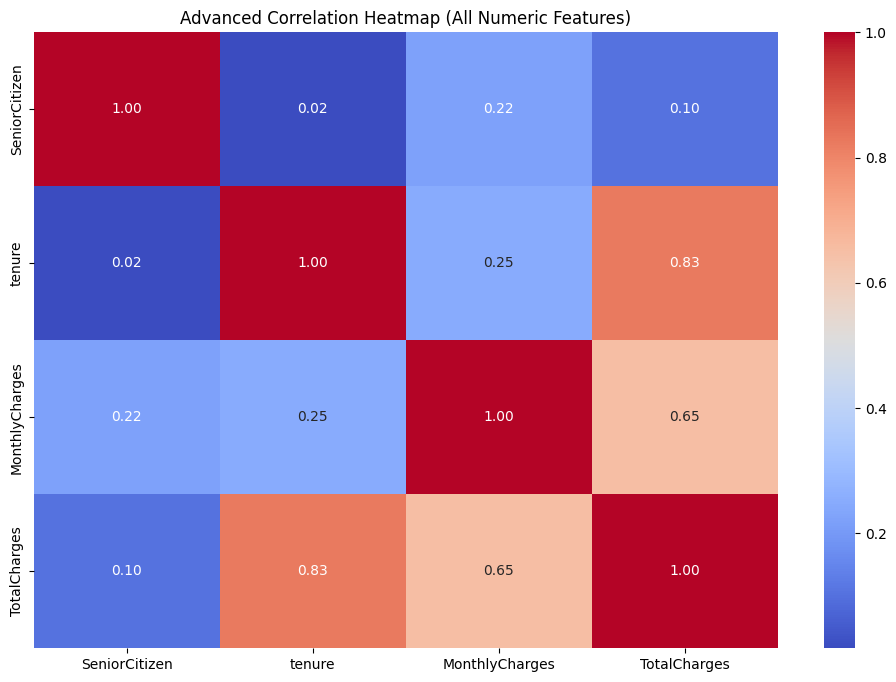

Churn not encoded yet — correlations with target will appear after preprocessing.


In [18]:
# Compute correlation across all numerical features (including churn if encoded later)
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Advanced Correlation Heatmap (All Numeric Features)")
plt.show()

# Show strongest correlations with Churn
if 'Churn' in corr.columns:
    print("\nTop correlations with Churn:")
    display(corr['Churn'].sort_values(ascending=False).head(10))
else:
    print("Churn not encoded yet — correlations with target will appear after preprocessing.")


**Churn Rate by Contract Type**

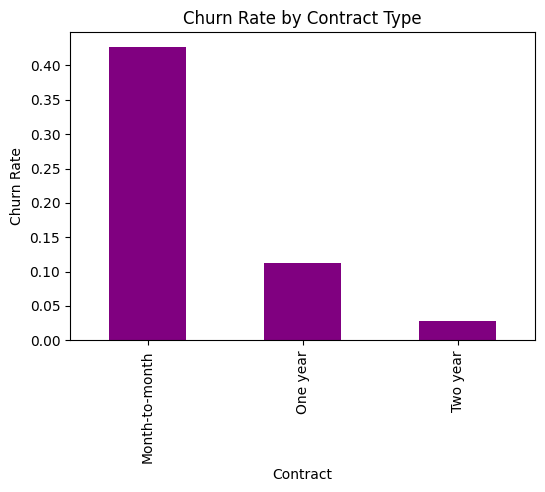

In [19]:
contract_churn = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()
contract_churn["Yes"].plot(kind="bar", figsize=(6,4), color="purple")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()


**Tenure binning**

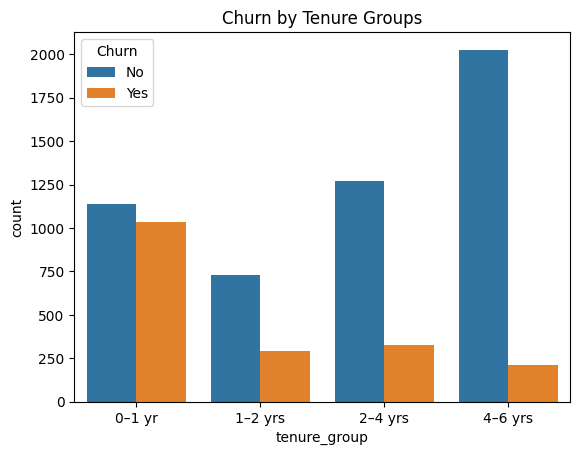

In [20]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–1 yr', '1–2 yrs', '2–4 yrs', '4–6 yrs']
)

sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title("Churn by Tenure Groups")
plt.show()

# 03. Data cleaning and Pre processing

- Fixing data types (e.g., converting TotalCharges to numeric)
- Handling missing values created during conversion
- Encoding categorical variables using One-Hot Encoding
- Scaling numerical features (required for Neural Networks)
- Splitting the dataset into training and testing sets


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [22]:
# #make a dataset copy
# data = df.copy()

# print("Starting preprocessing on shape:", data.shape)
# print("="*50)
# print("\nMissing values after cleaning:", df.isna().sum().sum())

**Drop Unnecessary columns**

In [23]:
# # 'customerID' - dropped as it has no predictive value
# data.drop('customerID', axis=1, inplace=True)
# print("Dropped customerID column")

**Fix TotalCharges Data Type - convert it to numeric**

In [24]:
# Check current data type
print("Current TotalCharges dtype:", df['TotalCharges'].dtype)
print("\nSample values:")
print(df['TotalCharges'].head(10))

# Check for non-numeric values
print("\nChecking for non-numeric values...")
non_numeric = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]
print(f"Number of non-numeric values: {len(non_numeric)}")
if len(non_numeric) > 0:
    print("\nNon-numeric entries:")
    display(non_numeric[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


Current TotalCharges dtype: float64

Sample values:
0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
5     820.50
6    1949.40
7     301.90
8    3046.05
9    3487.95
Name: TotalCharges, dtype: float64

Checking for non-numeric values...
Number of non-numeric values: 0


In [25]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values
print(f"NaN values after conversion: {df['TotalCharges'].isna().sum()}")
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0   #fill with 0 for customers with 0 tenure

# Verify conversion
print("\nAfter conversion:")
print(f"TotalCharges dtype: {df['TotalCharges'].dtype}")
print(f"Remaining NaN values: {df['TotalCharges'].isna().sum()}")
print(f"\nTotalCharges statistics:")
print(df['TotalCharges'].describe())

NaN values after conversion: 0

After conversion:
TotalCharges dtype: float64
Remaining NaN values: 0

TotalCharges statistics:
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


In [ ]:
# Remove leading/trailing spaces from all string columns
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

# Drop exact duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicates removed: {duplicates}")
df = df.drop_duplicates()

# Convert SeniorCitizen to integer (sometimes loaded as float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

# Re-check for NA values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


**Drop Irrelevant Columns - Remove `customerID` (identifier with no predictive value)**

In [26]:
print(f"Columns before dropping: {df.shape[1]}")
df = df.drop('customerID', axis=1)
print(f"Columns after dropping: {df.shape[1]}")
print("\nRemaining columns:")
print(df.columns.tolist())

Columns before dropping: 22
Columns after dropping: 21

Remaining columns:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']


**Encode Target Variable - Convert the `Churn` column from categorical (Yes/No) to binary (1/0).**

In [27]:
# Check current distribution
print("Current Churn distribution:")
print(df['Churn'].value_counts())
print("\nPercentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

# Encode Churn: Yes=1, No=0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Verify encoding
print("\nAfter encoding:")
print(df['Churn'].value_counts())
print(f"\nChurn rate: {df['Churn'].mean()*100:.2f}%")


Current Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

After encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn rate: 26.54%


**Encode Binary Categorical Featuree**


In [28]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

print("Encoding binary columns:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Encode binary columns
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

print("\n" + "="*50)
print("After encoding:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Encoding binary columns:

Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

After encoding:

Partner:
Partner
0    3641
1    3402
Name: count, dtype: int64

Dependents:
Dependents
0    4933
1    2110
Name: count, dtype: int64

PhoneService:
PhoneService
1    6361
0     682
Name: count, dtype: int64

PaperlessBilling:
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


**Handle 'No internet service' and 'No phone service' Values**


In [29]:
# Columns with 'No internet service'
internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace 'No internet service' with 'No'
for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')
    print(f"{col}: {df[col].unique()}")

print("\n" + "="*50)

# Handle MultipleLines 'No phone service'
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
print(f"\nMultipleLines: {df['MultipleLines'].unique()}")


OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']


MultipleLines: ['No' 'Yes']


**Encode Remaining Binary Features**

In [30]:
# These columns are now binary (Yes/No)
binary_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

print("Encoding service-related binary columns:")
for col in binary_service_cols:
    print(f"\n{col} before: {df[col].unique()}")
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"{col} after: {df[col].unique()}")


Encoding service-related binary columns:

OnlineSecurity before: ['No' 'Yes']
OnlineSecurity after: [0 1]

OnlineBackup before: ['Yes' 'No']
OnlineBackup after: [1 0]

DeviceProtection before: ['No' 'Yes']
DeviceProtection after: [0 1]

TechSupport before: ['No' 'Yes']
TechSupport after: [0 1]

StreamingTV before: ['No' 'Yes']
StreamingTV after: [0 1]

StreamingMovies before: ['No' 'Yes']
StreamingMovies after: [0 1]

MultipleLines before: ['No' 'Yes']
MultipleLines after: [0 1]


**Encode SeniorCitizen**

In [31]:
# Check SeniorCitizen
print("SeniorCitizen unique values:", df['SeniorCitizen'].unique())
print("SeniorCitizen value counts:")
print(df['SeniorCitizen'].value_counts())
# Already 0/1, no change needed


SeniorCitizen unique values: [0 1]
SeniorCitizen value counts:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


**Encode Gender**

In [32]:
print("Gender distribution before encoding:")
print(df['gender'].value_counts())

# Encode gender: Male=1, Female=0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

print("\nGender distribution after encoding:")
print(df['gender'].value_counts())

Gender distribution before encoding:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Gender distribution after encoding:
gender
1    3555
0    3488
Name: count, dtype: int64


**Summary of Preprocessed Data**

In [33]:
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
display(df.head())

# Check for any remaining missing values
print("\nMissing values:")
print(df.isnull().sum().sum())

# Identify remaining categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nRemaining categorical columns: {categorical_cols}")


Dataset shape: (7043, 21)

Data types:
gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
tenure_group        category
dtype: object

First few rows:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0–1 yr
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,2–4 yrs
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0–1 yr
3,1,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,2–4 yrs
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0–1 yr



Missing values:
11

Remaining categorical columns: ['InternetService', 'Contract', 'PaymentMethod']


**Train Test Split**


In [34]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts(normalize=True))


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set target distribution:")
print(y_test.value_counts(normalize=True))

Features shape: (7043, 20)
Target shape: (7043,)

Target distribution:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Training set size: (5634, 20)
Test set size: (1409, 20)

Training set target distribution:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test set target distribution:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


# 04. Feature Engineering

In [ ]:
# 1. Contract length in months (helps models a LOT)
df['ContractLength'] = df['Contract'].map({
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
})

# 2. AutoPay detection
df['IsAutoPay'] = df['PaymentMethod'].str.contains('automatic', case=False).astype(int)

# 3. Total Active Services (uses ALL service columns)
all_service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df['TotalActiveServices'] = df[all_service_cols].replace("No internet service","No").replace("No phone service","No")
df['TotalActiveServices'] = df['TotalActiveServices'].replace({'Yes':1,'No':0}).astype(int).sum(axis=1)

# 4. Charge Intensity: cost per service
df['ChargeIntensity'] = df['MonthlyCharges'] / (df['TotalActiveServices'].replace(0,1))

# 5. Improved Tenure Groups (clean, consistent)
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72, 100],
    labels=['0–1 yr','1–2 yrs','2–4 yrs','4–6 yrs','6+ yrs']
)

**One Hot Encoding for Multi Category Features**

In [ ]:
# Organize Columns for Preprocessing

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

cat_cols = ['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']


In [46]:

# Identify categorical columns that need one-hot encoding
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod', 'tenure_group']

print("Categorical columns for one-hot encoding:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(X_train[col].value_counts())

Categorical columns for one-hot encoding:

InternetService:
InternetService
Fiber optic    2483
DSL            1937
No             1214
Name: count, dtype: int64

Contract:
Contract
Month-to-month    3102
Two year          1359
One year          1173
Name: count, dtype: int64

PaymentMethod:
PaymentMethod
Electronic check             1891
Mailed check                 1286
Bank transfer (automatic)    1244
Credit card (automatic)      1213
Name: count, dtype: int64

tenure_group:
tenure_group
4–6 yrs    1789
0–1 yr     1729
2–4 yrs    1290
1–2 yrs     818
Name: count, dtype: int64


In [47]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder (drop='first' to avoid multicollinearity)
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit encoder on training data
encoder.fit(X_train[categorical_cols])

# Get feature names
feature_names = encoder.get_feature_names_out(categorical_cols)
print("One-hot encoded feature names:")
print(feature_names)

# Transform training data
X_train_encoded = encoder.transform(X_train[categorical_cols])
X_train_encoded_df = pd.DataFrame(
    X_train_encoded,
    columns=feature_names,
    index=X_train.index
)

# Transform test data
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(
    X_test_encoded,
    columns=feature_names,
    index=X_test.index
)

print(f"\nEncoded training data shape: {X_train_encoded_df.shape}")
print(f"Encoded test data shape: {X_test_encoded_df.shape}")

One-hot encoded feature names:
['InternetService_Fiber optic' 'InternetService_No' 'Contract_One year'
 'Contract_Two year' 'PaymentMethod_Credit card (automatic)'
 'PaymentMethod_Electronic check' 'PaymentMethod_Mailed check'
 'tenure_group_1–2 yrs' 'tenure_group_2–4 yrs' 'tenure_group_4–6 yrs'
 'tenure_group_nan']

Encoded training data shape: (5634, 11)
Encoded test data shape: (1409, 11)


In [48]:
# Drop original categorical columns and add encoded ones
X_train_processed = X_train.drop(categorical_cols, axis=1)
X_test_processed = X_test.drop(categorical_cols, axis=1)

# Concatenate encoded features
X_train_processed = pd.concat([X_train_processed, X_train_encoded_df], axis=1)
X_test_processed = pd.concat([X_test_processed, X_test_encoded_df], axis=1)

print("Training set shape after encoding:", X_train_processed.shape)
print("Test set shape after encoding:", X_test_processed.shape)
print("\nFinal feature names:")
print(X_train_processed.columns.tolist())

Training set shape after encoding: (5634, 27)
Test set shape after encoding: (1409, 27)

Final feature names:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_1–2 yrs', 'tenure_group_2–4 yrs', 'tenure_group_4–6 yrs', 'tenure_group_nan']


In [ ]:
# Handle Class Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_processed, y_train)

print("\nAfter SMOTE balancing:")
print(y_train_balanced.value_counts())


**Feature Scaling**

-Standardize numerical features to have mean=0 and std=1.


In [49]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Numerical columns to scale:")
print(numerical_cols)
print("\nBefore scaling (Training set):")
print(X_train_processed[numerical_cols].describe())

Numerical columns to scale:
['tenure', 'MonthlyCharges', 'TotalCharges']

Before scaling (Training set):
            tenure  MonthlyCharges  TotalCharges
count  5634.000000     5634.000000   5634.000000
mean     32.485091       64.929961   2299.334682
std      24.568744       30.138105   2279.204278
min       0.000000       18.400000      0.000000
25%       9.000000       35.662500    402.975000
50%      29.000000       70.500000   1394.925000
75%      55.000000       90.000000   3835.825000
max      72.000000      118.750000   8684.800000


In [50]:
# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data only
scaler.fit(X_train_processed[numerical_cols])

# Transform both training and test data
X_train_processed[numerical_cols] = scaler.transform(X_train_processed[numerical_cols])
X_test_processed[numerical_cols] = scaler.transform(X_test_processed[numerical_cols])

print("After scaling (Training set):")
print(X_train_processed[numerical_cols].describe())
print("\nAfter scaling (Test set):")
print(X_test_processed[numerical_cols].describe())

After scaling (Training set):
             tenure  MonthlyCharges  TotalCharges
count  5.634000e+03    5.634000e+03  5.634000e+03
mean  -1.008935e-17   -2.402527e-16  2.522338e-17
std    1.000089e+00    1.000089e+00  1.000089e+00
min   -1.322329e+00   -1.544028e+00 -1.008922e+00
25%   -9.559779e-01   -9.711977e-01 -8.321009e-01
50%   -1.418632e-01    1.848336e-01 -3.968446e-01
75%    9.164859e-01    8.319124e-01  6.741944e-01
max    1.608483e+00    1.785939e+00  2.801869e+00

After scaling (Test set):
            tenure  MonthlyCharges  TotalCharges
count  1409.000000     1409.000000   1409.000000
mean     -0.023184       -0.027911     -0.042990
std       0.998342        0.992131      0.972154
min      -1.322329       -1.549006     -1.008922
25%      -0.996684       -0.986545     -0.850914
50%      -0.182569        0.166583     -0.397009
75%       0.916486        0.813661      0.534693
max       1.608483        1.721231      2.719333


**Feature Engineering - Create New Features**

In [51]:
# Create new features for both train and test sets

#categorize tenure into group
def create_tenure_group(tenure_scaled, scaler):
    # Inverse transform to get original tenure values
    tenure_original = scaler.inverse_transform(tenure_scaled.values.reshape(-1, 1)).flatten()

    tenure_group = pd.cut(
        tenure_original,
        bins=[0, 12, 24, 48, 72],
        labels=['0-1 year', '1-2 years', '2-4 years', '4+ years']
    )
    return pd.get_dummies(tenure_group, prefix='TenureGroup', drop_first=True)


#avg Monthly Charges per Tenure Month
X_train_processed['AvgChargesPerMonth'] = (
    X_train_processed['TotalCharges'] / (X_train_processed['tenure'] + 1e-5)
)
X_test_processed['AvgChargesPerMonth'] = (
    X_test_processed['TotalCharges'] / (X_test_processed['tenure'] + 1e-5)
)

#Service Count - total no of services subscribed
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']
X_train_processed['ServiceCount'] = X_train_processed[service_cols].sum(axis=1)
X_test_processed['ServiceCount'] = X_test_processed[service_cols].sum(axis=1)

# Has Multiple Services (binary)
X_train_processed['HasMultipleServices'] = (X_train_processed['ServiceCount'] > 1).astype(int)
X_test_processed['HasMultipleServices'] = (X_test_processed['ServiceCount'] > 1).astype(int)

print("New features created:")
print("- AvgChargesPerMonth")
print("- ServiceCount")
print("- HasMultipleServices")
print(f"\nFinal training set shape: {X_train_processed.shape}")
print(f"Final test set shape: {X_test_processed.shape}")

New features created:
- AvgChargesPerMonth
- ServiceCount
- HasMultipleServices

Final training set shape: (5634, 30)
Final test set shape: (1409, 30)


**Dataset summary after preprocessing and engineering**

In [52]:
print("="*70)
print("FINAL PREPROCESSED DATASET SUMMARY")
print("="*70)

print(f"\nTraining set shape: {X_train_processed.shape}")
print(f"Test set shape: {X_test_processed.shape}")
print(f"Target variable shape (train): {y_train.shape}")
print(f"Target variable shape (test): {y_test.shape}")

print("\nAll features:")
print(X_train_processed.columns.tolist())

print("\nData types:")
print(X_train_processed.dtypes.value_counts())

print("\nMissing values in training set:", X_train_processed.isnull().sum().sum())
print("Missing values in test set:", X_test_processed.isnull().sum().sum())

print("\nFirst few rows of processed training data:")
display(X_train_processed.head())

FINAL PREPROCESSED DATASET SUMMARY

Training set shape: (5634, 30)
Test set shape: (1409, 30)
Target variable shape (train): (5634,)
Target variable shape (test): (1409,)

All features:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_1–2 yrs', 'tenure_group_2–4 yrs', 'tenure_group_4–6 yrs', 'tenure_group_nan', 'AvgChargesPerMonth', 'ServiceCount', 'HasMultipleServices']

Data types:
int64      15
float64    15
Name: count, dtype: int64

Missing values in training set: 0
Missing values in test set: 0

First few rows of processed training data:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1–2 yrs,tenure_group_2–4 yrs,tenure_group_4–6 yrs,tenure_group_nan,AvgChargesPerMonth,ServiceCount,HasMultipleServices
3738,1,0,0,0,0.102371,0,0,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-2.561575,3,1
3151,1,0,1,1,-0.711743,1,0,1,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.707617,1,0
4860,1,0,1,1,-0.793155,0,0,1,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.945455,3,1
3867,0,0,1,0,-0.263980,1,0,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.654325,4,1
3810,1,0,1,1,-1.281624,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.771975,0,0


In [53]:
# Check for any infinite values (from division)
import numpy as np

# Identify numerical columns to check for inf (excluding the 'tenure_group' categorical column)
numerical_cols_processed = X_train_processed.select_dtypes(include=np.number).columns.tolist()

print("Checking for infinite values...")
print(f"Training set infinite values: {np.isinf(X_train_processed[numerical_cols_processed]).sum().sum()}")
print(f"Test set infinite values: {np.isinf(X_test_processed[numerical_cols_processed]).sum().sum()}")

# Replace any infinite values with 0, only in numerical columns
X_train_processed[numerical_cols_processed].replace([np.inf, -np.inf], 0, inplace=True)
X_test_processed[numerical_cols_processed].replace([np.inf, -np.inf], 0, inplace=True)

print("\nAfter handling infinite values:")
print(f"Training set infinite values: {np.isinf(X_train_processed[numerical_cols_processed]).sum().sum()}")
print(f"Test set infinite values: {np.isinf(X_test_processed[numerical_cols_processed]).sum().sum()}")

Checking for infinite values...
Training set infinite values: 0
Test set infinite values: 0

After handling infinite values:
Training set infinite values: 0
Test set infinite values: 0


**SAVING**

In [ ]:
# Optional: Save preprocessed data
# X_train_processed.to_csv('X_train_processed.csv', index=False)
# X_test_processed.to_csv('X_test_processed.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# print("Preprocessing and Feature Engineering Complete! ✅")
# print("\nYou can now proceed to model building with:")
# print("- X_train_processed")
# print("- X_test_processed")
# print("- y_train")
# print("- y_test")

# 05. Decision Tree Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


**Baseline DT model with default parameters.
"""**

In [54]:
print("="*70)
print("BASELINE DECISION TREE MODEL")
print("="*70)

# Train baseline model
dt_baseline = DecisionTreeClassifier(random_state=42)
#dt_baseline.fit(X_train_processed, y_train)
dt_baseline.fit(X_train_balanced, y_train_balanced)


print("\n✅ Baseline Decision Tree model trained successfully!")
print(f"   Tree depth: {dt_baseline.get_depth()}")
print(f"   Number of leaves: {dt_baseline.get_n_leaves()}")


BASELINE DECISION TREE MODEL

✅ Baseline Decision Tree model trained successfully!
   Tree depth: 28
   Number of leaves: 1033


**Hyperparameter Tuning - GridSearchCV to find optimal hyperparameters**

In [56]:
print("\n" + "="*70)
print("HYPERPARAMETER TUNING - DECISION TREE")
print("="*70)

# Define parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("\nStarting Grid Search...")
print("This may take a few minutes...\n")
dt_grid.fit(X_train_processed, y_train)

print("\n" + "="*70)
print("GRID SEARCH RESULTS")
print("="*70)
print("\nBest Parameters:")
for param, value in dt_grid.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation ROC-AUC Score: {dt_grid.best_score_:.4f}")


HYPERPARAMETER TUNING - DECISION TREE

Starting Grid Search...
This may take a few minutes...

Fitting 5 folds for each of 576 candidates, totalling 2880 fits

GRID SEARCH RESULTS

Best Parameters:
  criterion: entropy
  max_depth: 5
  max_features: None
  min_samples_leaf: 8
  min_samples_split: 2

Best Cross-Validation ROC-AUC Score: 0.8245


**Optimal Decision Tree Model - final model with optimized hyperparameters**

In [57]:
print("\n" + "="*70)
print("OPTIMAL DECISION TREE MODEL")
print("="*70)

# Get optimal model
dt_optimal = dt_grid.best_estimator_

# Make predictions (store for later comparison)
y_train_pred_dt = dt_optimal.predict(X_train_processed)
y_test_pred_dt = dt_optimal.predict(X_test_processed)
y_test_proba_dt = dt_optimal.predict_proba(X_test_processed)[:, 1]

print("\nOptimal Decision Tree model trained successfully!")
print(f"   Tree depth: {dt_optimal.get_depth()}")
print(f"   Number of leaves: {dt_optimal.get_n_leaves()}")
print("\nPredictions stored in:")
print("  - y_train_pred_dt (training predictions)")
print("  - y_test_pred_dt (test predictions)")
print("  - y_test_proba_dt (test probabilities)")


OPTIMAL DECISION TREE MODEL

✅ Optimal Decision Tree model trained successfully!
   Tree depth: 5
   Number of leaves: 26

Predictions stored in:
  - y_train_pred_dt (training predictions)
  - y_test_pred_dt (test predictions)
  - y_test_proba_dt (test probabilities)


**Feature Importance Analysis**


FEATURE IMPORTANCE

Top 15 Important Features:
                       Feature  Importance
             Contract_Two year    0.359767
             Contract_One year    0.228289
                        tenure    0.130185
   InternetService_Fiber optic    0.126894
PaymentMethod_Electronic check    0.036880
                MonthlyCharges    0.034456
                  TotalCharges    0.032561
               StreamingMovies    0.032448
            InternetService_No    0.012910
            AvgChargesPerMonth    0.005611
                 SeniorCitizen    0.000000
                       Partner    0.000000
                    Dependents    0.000000
                        gender    0.000000
              PaperlessBilling    0.000000


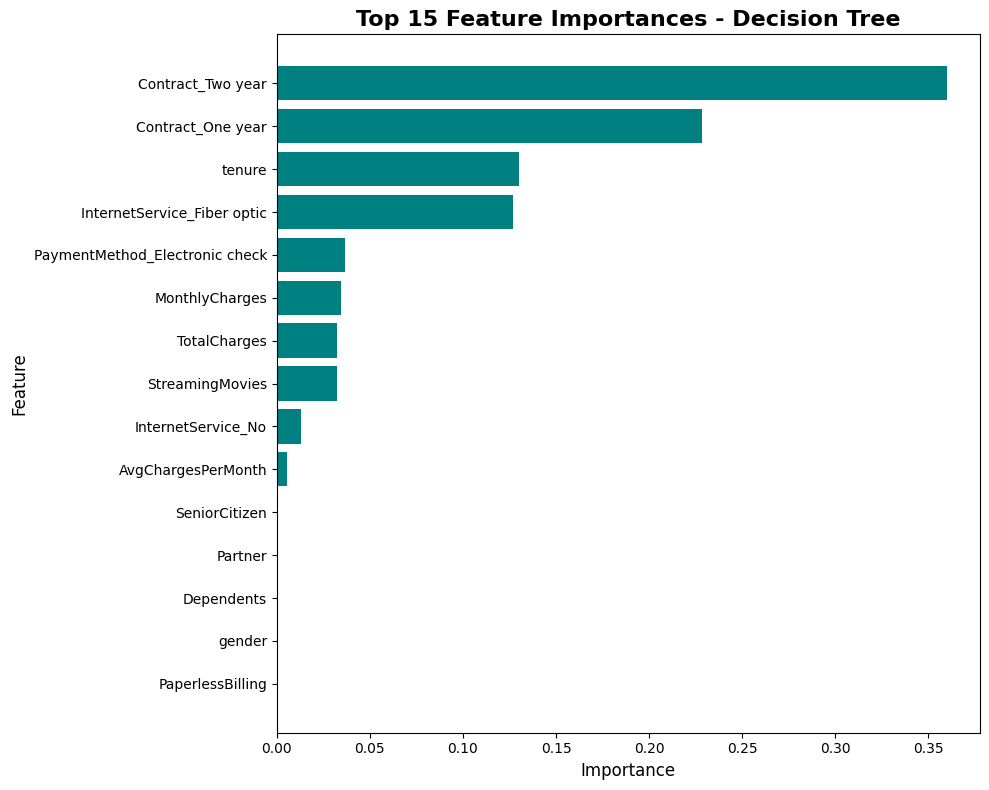

In [62]:
# Get feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': dt_optimal.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*70)
print("FEATURE IMPORTANCE")
print("="*70)
print("\nTop 15 Important Features:")
print(feature_importance_dt.head(15).to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance_dt.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='teal')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Feature Importances - Decision Tree',
          fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Decision Tree Visualization**

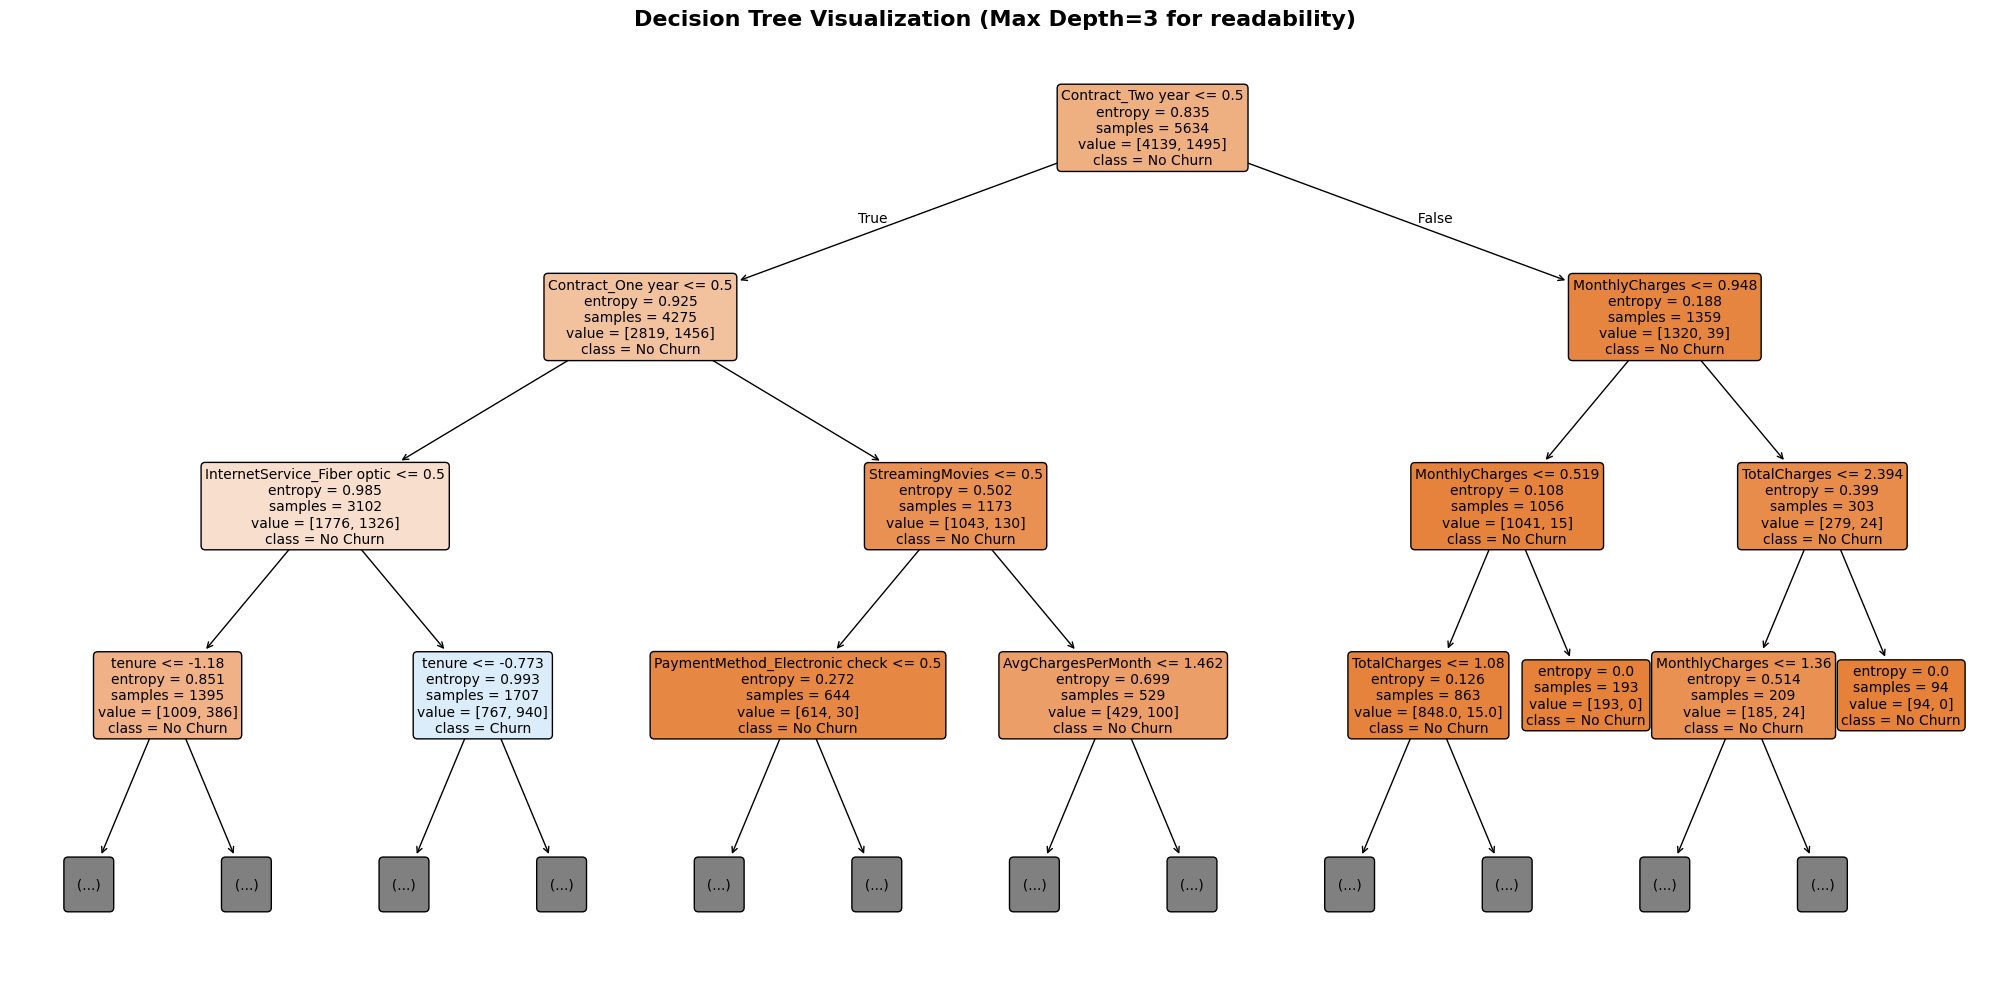


Note: Only first 3 levels shown for readability
Actual tree depth: 5
Number of leaves: 26


In [69]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_optimal,
               feature_names=X_train_processed.columns,
               class_names=['No Churn', 'Churn'],
               filled=True,
               rounded=True,
               fontsize=10,
               max_depth=3)  # Limit depth for readability
plt.title('Decision Tree Visualization (Max Depth=3 for readability)',
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nNote: Only first 3 levels shown for readability")
print(f"Actual tree depth: {dt_optimal.get_depth()}")
print(f"Number of leaves: {dt_optimal.get_n_leaves()}")

**Model Summary**

In [74]:
print("\n" + "="*70)
print("DECISION TREE MODEL - SUMMARY")
print("="*70)

print("\nMODEL CONFIGURATION:")
print(f"  Algorithm: Decision Tree Classifier")
print(f"  Criterion: {dt_optimal.criterion}")
print(f"  Max Depth: {dt_optimal.max_depth}")
print(f"  Min Samples Split: {dt_optimal.min_samples_split}")
print(f"  Min Samples Leaf: {dt_optimal.min_samples_leaf}")
print(f"  Max Features: {dt_optimal.max_features}")

print("\nKEY INSIGHTS:")
print(f"  - Most important feature: {feature_importance_dt.iloc[0]['Feature']}")
print(f"  - Tree depth: {dt_optimal.get_depth()}")
print(f"  - Number of leaves: {dt_optimal.get_n_leaves()}")
print(f"  - Best CV ROC-AUC: {dt_grid.best_score_:.4f}")

print("\nDecision Tree model ready for comparison!")
print("\nStored variables:")
print("  - dt_optimal: Trained model")
print("  - y_test_pred_dt: Test predictions")
print("  - y_test_proba_dt: Test probabilities")
print("  - feature_importance_dt: Feature importance DataFrame")


DECISION TREE MODEL - SUMMARY

MODEL CONFIGURATION:
  Algorithm: Decision Tree Classifier
  Criterion: entropy
  Max Depth: 5
  Min Samples Split: 2
  Min Samples Leaf: 8
  Max Features: None

KEY INSIGHTS:
  - Most important feature: Contract_Two year
  - Tree depth: 5
  - Number of leaves: 26
  - Best CV ROC-AUC: 0.8245

Decision Tree model ready for comparison!

Stored variables:
  - dt_optimal: Trained model
  - y_test_pred_dt: Test predictions
  - y_test_proba_dt: Test probabilities
  - feature_importance_dt: Feature importance DataFrame


# 06. Neural Network Model

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")
print("Neural Network libraries imported successfully!")

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

TensorFlow version: 2.19.0
Neural Network libraries imported successfully!


**Baseline NN Model - simple architecture**

In [72]:
print("="*70)
print("BASELINE NEURAL NETWORK MODEL")
print("="*70)

# Build baseline model
def create_baseline_nn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

nn_baseline = create_baseline_nn()
print("\nBaseline Model Architecture:")
nn_baseline.summary()

BASELINE NEURAL NETWORK MODEL

Baseline Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
print("\nTraining Baseline Neural Network...")

# Train baseline model
# history_baseline = nn_baseline.fit(
#     X_train_processed, y_train,
#     epochs=50,
#     batch_size=32,
#     validation_split=0.2,
#     verbose=0
# )

history_baseline = nn_baseline.fit(
    X_train_balanced, y_train_balanced,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

print("\n✅ Baseline Neural Network trained successfully!")
print(f"   Final training accuracy: {history_baseline.history['accuracy'][-1]:.4f}")
print(f"   Final validation accuracy: {history_baseline.history['val_accuracy'][-1]:.4f}")



Training Baseline Neural Network...

✅ Baseline Neural Network trained successfully!
   Final training accuracy: 0.8589
   Final validation accuracy: 0.7551


**Optimal NN Model - with regularization techniques**

In [75]:
print("\n" + "="*70)
print("OPTIMAL NEURAL NETWORK MODEL")
print("="*70)

# Build optimal model with regularization
def create_optimal_nn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(16, activation='relu'),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

nn_optimal = create_optimal_nn()
print("\nOptimal Model Architecture:")
nn_optimal.summary()


OPTIMAL NEURAL NETWORK MODEL

Optimal Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,297 (59.75 KB)

 Non-trainable params: 448 (1.75 KB)

**Train Neural Network - with callbacks for early stopping and learning rate reduction**

In [76]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

print("Callbacks configured:")
print("  - Early Stopping (patience=15)")
print("  - Learning Rate Reduction (patience=5)")


Callbacks configured:
  - Early Stopping (patience=15)
  - Learning Rate Reduction (patience=5)


In [77]:
print("\n" + "="*70)
print("TRAINING OPTIMAL NEURAL NETWORK")
print("="*70)
print("\nThis may take a few minutes...\n")

# Train optimal model
history_optimal = nn_optimal.fit(
    X_train_balanced, y_train_balanced,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n✅ Optimal Neural Network trained successfully!")



TRAINING OPTIMAL NEURAL NETWORK

This may take a few minutes...

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6862 - auc: 0.6536 - loss: 0.5907 - val_accuracy: 0.7791 - val_auc: 0.8054 - val_loss: 0.4771 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7838 - auc: 0.8150 - loss: 0.4508 - val_accuracy: 0.7755 - val_auc: 0.8081 - val_loss: 0.4542 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7840 - auc: 0.8176 - loss: 0.4464 - val_accuracy: 0.7764 - val_auc: 0.8153 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7935 - auc: 0.8229 - loss: 0.4407 - val_accuracy: 0.7808 - val_auc: 0.8165 - val_loss: 0.4492 - learning_rate: 0.0010
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7964 - auc: 0.8345 - loss: 0.4285 - val_accuracy: 0.7862 - val_auc: 0.8168 - val_loss: 0.4483 - learning_rate: 0.0010
Epoch 6/1

In [78]:
# Make predictions (store for later comparison)
y_test_pred_nn_proba = nn_optimal.predict(X_test_processed).flatten()
y_test_pred_nn = (y_test_pred_nn_proba > 0.5).astype(int)

print("\nPredictions stored in:")
print("  - y_test_pred_nn (test predictions)")
print("  - y_test_pred_nn_proba (test probabilities)")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Predictions stored in:
  - y_test_pred_nn (test predictions)
  - y_test_pred_nn_proba (test probabilities)


**Training History Visualization - Visualize the training process to understand model learning**

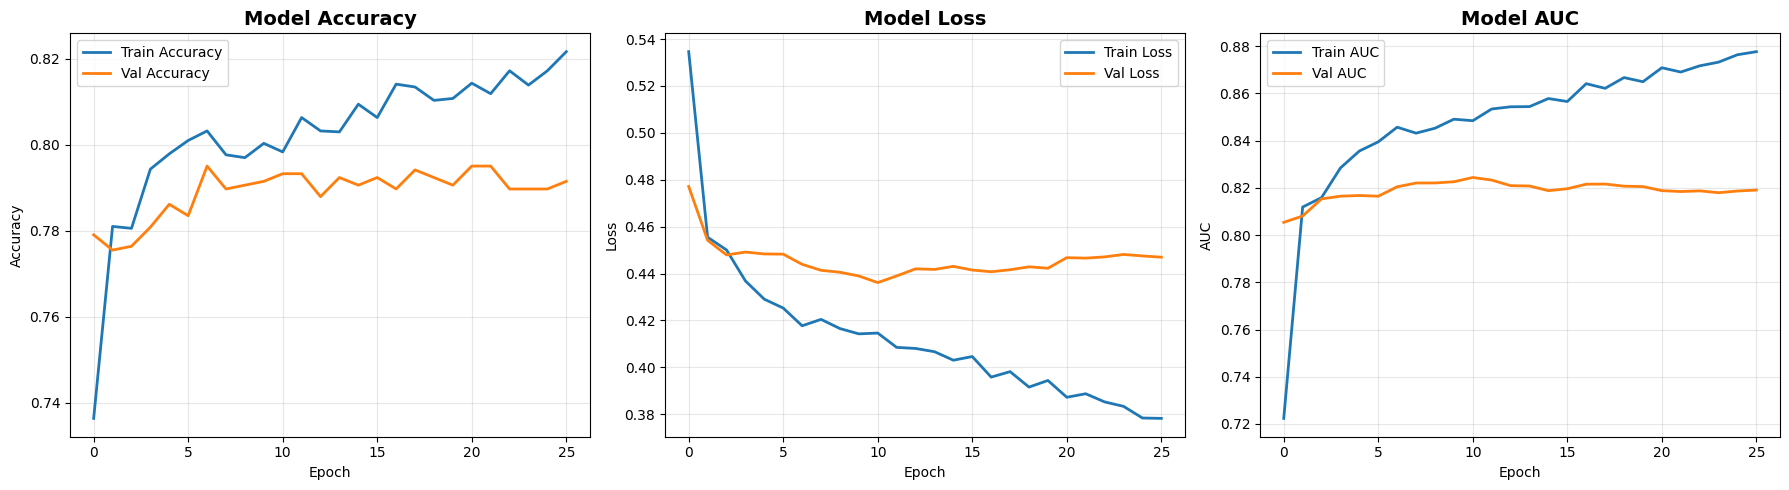


Training completed in 26 epochs


In [79]:
# Plot training history
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy
axes[0].plot(history_optimal.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history_optimal.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss
axes[1].plot(history_optimal.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history_optimal.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# AUC
axes[2].plot(history_optimal.history['auc'], label='Train AUC', linewidth=2)
axes[2].plot(history_optimal.history['val_auc'], label='Val AUC', linewidth=2)
axes[2].set_title('Model AUC', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('AUC')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTraining completed in", len(history_optimal.history['loss']), "epochs")


**Model Summary**

In [80]:
print("\n" + "="*70)
print("NEURAL NETWORK MODEL - SUMMARY")
print("="*70)

print("\nMODEL CONFIGURATION:")
print(f"  Architecture: 4 Hidden Layers (128→64→32→16)")
print(f"  Activation: ReLU (hidden), Sigmoid (output)")
print(f"  Optimizer: Adam (lr=0.001)")
print(f"  Regularization: Dropout (0.3, 0.3, 0.2) + Batch Normalization")
print(f"  Loss Function: Binary Crossentropy")

print("\nTRAINING DETAILS:")
print(f"  Total epochs: {len(history_optimal.history['loss'])}")
print(f"  Batch size: 32")
print(f"  Validation split: 20%")
print(f"  Final train accuracy: {history_optimal.history['accuracy'][-1]:.4f}")
print(f"  Final validation accuracy: {history_optimal.history['val_accuracy'][-1]:.4f}")
print(f"  Final train AUC: {history_optimal.history['auc'][-1]:.4f}")
print(f"  Final validation AUC: {history_optimal.history['val_auc'][-1]:.4f}")

print("\nMODEL CHARACTERISTICS:")
total_params = nn_optimal.count_params()
print(f"  Total parameters: {total_params:,}")
print(f"  Trainable parameters: {total_params:,}")

print("\nNeural Network model ready for comparison!")
print("\nStored variables:")
print("  - nn_optimal: Trained model")
print("  - y_test_pred_nn: Test predictions")
print("  - y_test_pred_nn_proba: Test probabilities")
print("  - history_optimal: Training history")



NEURAL NETWORK MODEL - SUMMARY

MODEL CONFIGURATION:
  Architecture: 4 Hidden Layers (128→64→32→16)
  Activation: ReLU (hidden), Sigmoid (output)
  Optimizer: Adam (lr=0.001)
  Regularization: Dropout (0.3, 0.3, 0.2) + Batch Normalization
  Loss Function: Binary Crossentropy

TRAINING DETAILS:
  Total epochs: 26
  Batch size: 32
  Validation split: 20%
  Final train accuracy: 0.8216
  Final validation accuracy: 0.7915
  Final train AUC: 0.8777
  Final validation AUC: 0.8191

MODEL CHARACTERISTICS:
  Total parameters: 15,745
  Trainable parameters: 15,745

Neural Network model ready for comparison!

Stored variables:
  - nn_optimal: Trained model
  - y_test_pred_nn: Test predictions
  - y_test_pred_nn_proba: Test probabilities
  - history_optimal: Training history


# 07. Model Evaluation & Comparison

- Compare Decision Tree and Neural Network models using comprehensive evaluation metrics

In [81]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("Evaluation libraries imported successfully!")


Evaluation libraries imported successfully!


**Decision Tree - Performance Metrics**

In [82]:
print("="*70)
print("DECISION TREE - PERFORMANCE EVALUATION")
print("="*70)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_dt):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_dt):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_proba_dt):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt,
                          target_names=['No Churn', 'Churn']))


DECISION TREE - PERFORMANCE EVALUATION

Test Set Performance:
Accuracy:  0.7935
Precision: 0.6531
Recall:    0.4733
F1-Score:  0.5488
ROC-AUC:   0.8279

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.91      0.87      1035
       Churn       0.65      0.47      0.55       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



**Neural Network - Performance Metrics**

In [83]:
print("\n" + "="*70)
print("NEURAL NETWORK - PERFORMANCE EVALUATION")
print("="*70)

print("\nTest Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_nn):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred_nn):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred_nn):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_test_pred_nn_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_nn,
                          target_names=['No Churn', 'Churn']))




NEURAL NETWORK - PERFORMANCE EVALUATION

Test Set Performance:
Accuracy:  0.7942
Precision: 0.6338
Recall:    0.5321
F1-Score:  0.5785
ROC-AUC:   0.8358

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.86      1035
       Churn       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



**Confusion Matrices Comparison**

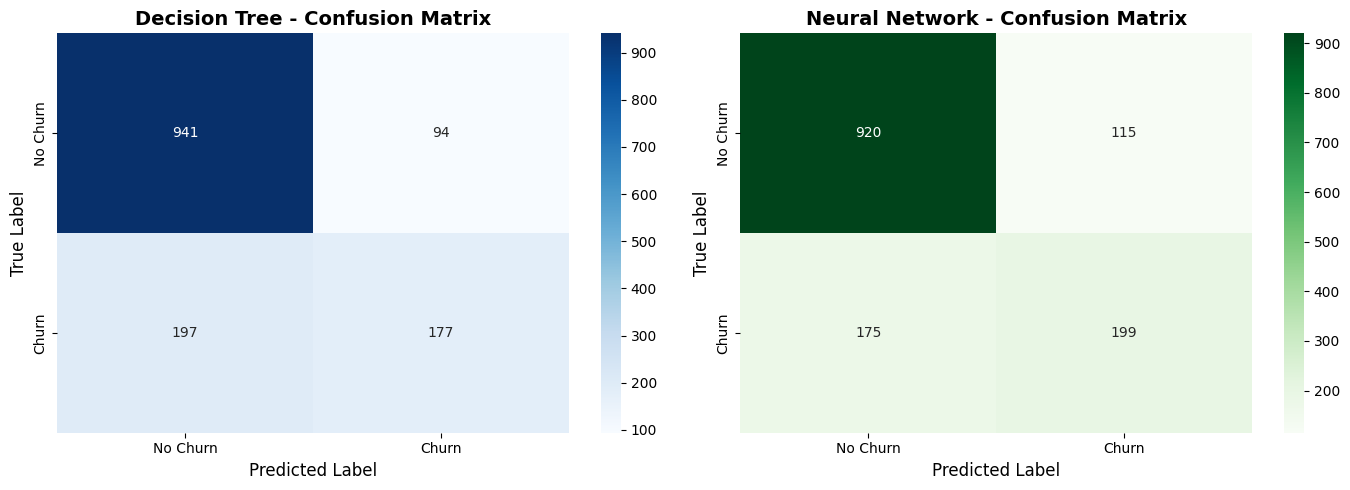


Decision Tree - Confusion Matrix:
  True Negatives:  941
  False Positives: 94
  False Negatives: 197
  True Positives:  177

Neural Network - Confusion Matrix:
  True Negatives:  920
  False Positives: 115
  False Negatives: 175
  True Positives:  199


In [84]:
# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Neural Network
cm_nn = confusion_matrix(y_test, y_test_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
axes[1].set_title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("\nDecision Tree - Confusion Matrix:")
print(f"  True Negatives:  {cm_dt[0,0]}")
print(f"  False Positives: {cm_dt[0,1]}")
print(f"  False Negatives: {cm_dt[1,0]}")
print(f"  True Positives:  {cm_dt[1,1]}")

print("\nNeural Network - Confusion Matrix:")
print(f"  True Negatives:  {cm_nn[0,0]}")
print(f"  False Positives: {cm_nn[0,1]}")
print(f"  False Negatives: {cm_nn[1,0]}")
print(f"  True Positives:  {cm_nn[1,1]}")


**ROC Curves Comparison**

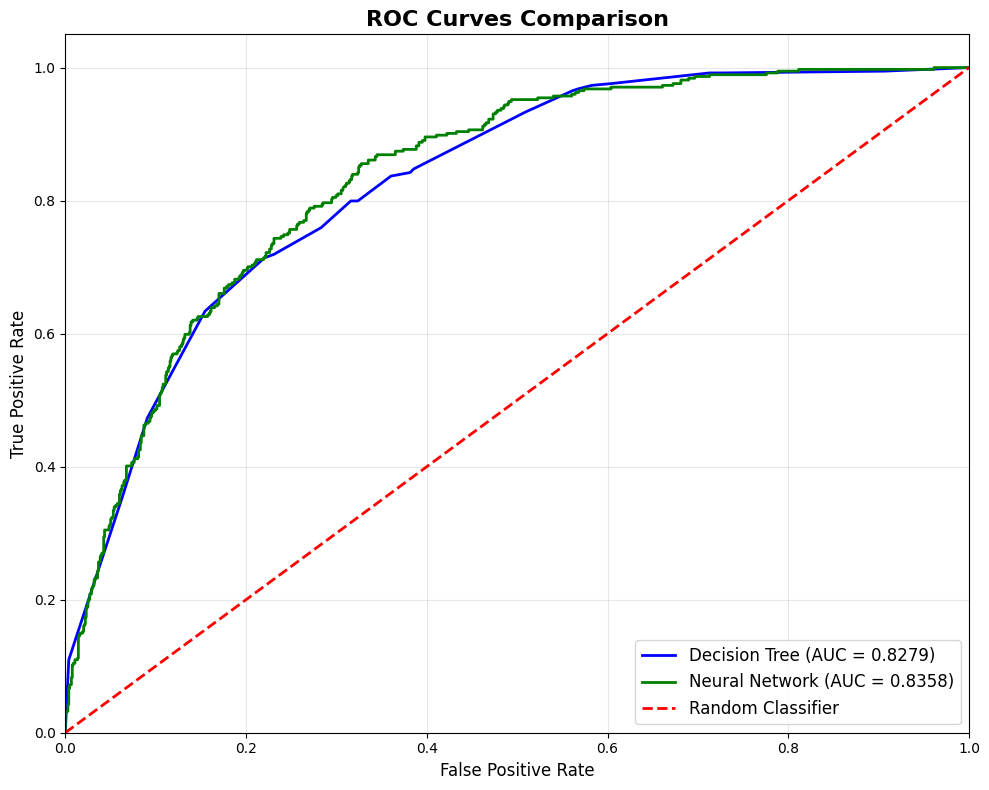

In [85]:
# Calculate ROC curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_proba_dt)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_test_pred_nn_proba)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_test_proba_dt):.4f})',
         linewidth=2, color='blue')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_score(y_test, y_test_pred_nn_proba):.4f})',
         linewidth=2, color='green')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Performance Comparison Table**

In [86]:
# Create comprehensive comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Decision Tree': [
        accuracy_score(y_test, y_test_pred_dt),
        precision_score(y_test, y_test_pred_dt),
        recall_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_dt),
        roc_auc_score(y_test, y_test_proba_dt)
    ],
    'Neural Network': [
        accuracy_score(y_test, y_test_pred_nn),
        precision_score(y_test, y_test_pred_nn),
        recall_score(y_test, y_test_pred_nn),
        f1_score(y_test, y_test_pred_nn),
        roc_auc_score(y_test, y_test_pred_nn_proba)
    ]
})

comparison_df['Difference'] = comparison_df['Neural Network'] - comparison_df['Decision Tree']
comparison_df['Better Model'] = comparison_df['Difference'].apply(
    lambda x: 'Neural Network' if x > 0 else ('Decision Tree' if x < 0 else 'Tie')
)

print("\n" + "="*70)
print("MODEL PERFORMANCE COMPARISON")
print("="*70)
print()
display(comparison_df.round(4))



MODEL PERFORMANCE COMPARISON



,Metric,Decision Tree,Neural Network,Difference,Better Model
0,Accuracy,0.7935,0.7942,0.0007,Neural Network
1,Precision,0.6531,0.6338,-0.0194,Decision Tree
2,Recall,0.4733,0.5321,0.0588,Neural Network
3,F1-Score,0.5488,0.5785,0.0297,Neural Network
4,ROC-AUC,0.8279,0.8358,0.0079,Neural Network


**Visual Performance Comparison**

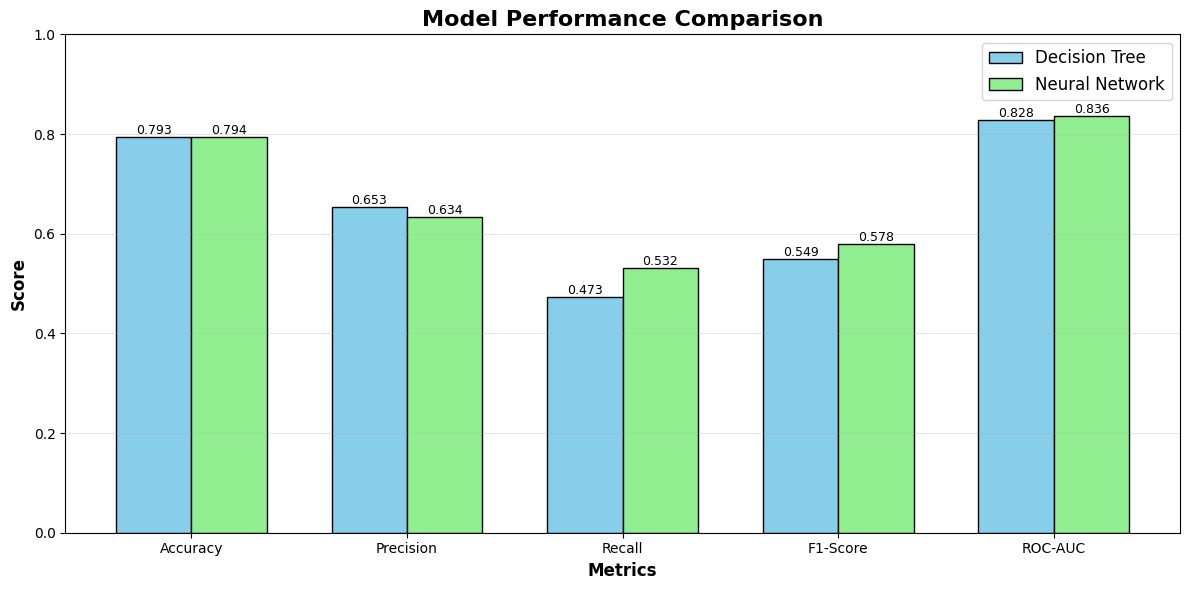

In [87]:
# Create bar chart comparison
metrics = comparison_df['Metric'].tolist()
dt_scores = comparison_df['Decision Tree'].tolist()
nn_scores = comparison_df['Neural Network'].tolist()

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree',
               color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, nn_scores, width, label='Neural Network',
               color='lightgreen', edgecolor='black')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=12)
ax.grid(True, axis='y', alpha=0.3)
ax.set_ylim([0, 1.0])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Final Model Selection and Insights**


In [88]:
print("\n" + "="*70)
print("FINAL MODEL SELECTION")
print("="*70)

# Calculate average performance
dt_avg = comparison_df['Decision Tree'].mean()
nn_avg = comparison_df['Neural Network'].mean()

print(f"\nDecision Tree - Average Score: {dt_avg:.4f}")
print(f"Neural Network - Average Score: {nn_avg:.4f}")
print(f"Difference: {abs(nn_avg - dt_avg):.4f}")

# Determine winner
if nn_avg > dt_avg:
    winner = "Neural Network"
    winner_emoji = "🧠"
else:
    winner = "Decision Tree"
    winner_emoji = "🌳"

print(f"\n{winner_emoji} WINNER: {winner}")
print(f"Performance advantage: {abs(nn_avg - dt_avg)*100:.2f}%")

# Detailed insights
print("\n" + "="*70)
print("KEY INSIGHTS")
print("="*70)

print("\n📊 Performance Analysis:")
for metric in comparison_df['Metric']:
    row = comparison_df[comparison_df['Metric'] == metric].iloc[0]
    dt_val = row['Decision Tree']
    nn_val = row['Neural Network']
    better = row['Better Model']

    if better == 'Neural Network':
        symbol = "✓ NN"
        color = "green"
    elif better == 'Decision Tree':
        symbol = "✓ DT"
        color = "blue"
    else:
        symbol = "="
        color = "gray"

    print(f"  {metric:12s}: DT={dt_val:.4f} | NN={nn_val:.4f} | {symbol}")

print("\n🎯 Model Characteristics:")
print("\nDecision Tree:")
print("  ✓ Highly interpretable (feature importance, tree visualization)")
print("  ✓ Fast training and prediction")
print("  ✓ No feature scaling required")
print("  ✓ Handles non-linear relationships well")
print("  ✗ Prone to overfitting without pruning")
print("  ✗ Can be unstable with small data changes")

print("\nNeural Network:")
print("  ✓ Captures complex non-linear patterns")
print("  ✓ Regularization prevents overfitting")
print("  ✓ Scalable to large datasets")
print("  ✓ Can improve with more data")
print("  ✗ Less interpretable (black box)")
print("  ✗ Requires more computational resources")
print("  ✗ Needs careful hyperparameter tuning")

print("\n💡 Recommendation:")
if winner == "Neural Network":
    print("  Use Neural Network for:")
    print("    - Production deployment (better generalization)")
    print("    - When accuracy is the primary concern")
    print("    - When computational resources are available")
    print("\n  Use Decision Tree for:")
    print("    - Exploratory analysis and feature understanding")
    print("    - When model interpretability is critical")
    print("    - When quick predictions are needed")
else:
    print("  Use Decision Tree for:")
    print("    - Production deployment (simpler and interpretable)")
    print("    - When model transparency is required")
    print("    - When computational resources are limited")
    print("\n  Use Neural Network for:")
    print("    - Further experimentation with architecture")
    print("    - When more training data becomes available")
    print("    - As an ensemble component")

print("\n" + "="*70)
print("EVALUATION COMPLETE!")
print("="*70)


FINAL MODEL SELECTION

Decision Tree - Average Score: 0.6593
Neural Network - Average Score: 0.6749
Difference: 0.0155

🧠 WINNER: Neural Network
Performance advantage: 1.55%

KEY INSIGHTS

📊 Performance Analysis:
  Accuracy    : DT=0.7935 | NN=0.7942 | ✓ NN
  Precision   : DT=0.6531 | NN=0.6338 | ✓ DT
  Recall      : DT=0.4733 | NN=0.5321 | ✓ NN
  F1-Score    : DT=0.5488 | NN=0.5785 | ✓ NN
  ROC-AUC     : DT=0.8279 | NN=0.8358 | ✓ NN

🎯 Model Characteristics:

Decision Tree:
  ✓ Highly interpretable (feature importance, tree visualization)
  ✓ Fast training and prediction
  ✓ No feature scaling required
  ✓ Handles non-linear relationships well
  ✗ Prone to overfitting without pruning
  ✗ Can be unstable with small data changes

Neural Network:
  ✓ Captures complex non-linear patterns
  ✓ Regularization prevents overfitting
  ✓ Scalable to large datasets
  ✓ Can improve with more data
  ✗ Less interpretable (black box)
  ✗ Requires more computational resources
  ✗ Needs careful hyperp